In [1]:
from lrp_update import query_openet

In [4]:
# Create an Openet object with a path to the database and the api key
path_to_folder_with_data = 'data'

open_et_obj = query_openet.OpenetApi.from_file(path_dataset=path_to_folder_with_data,
                                     fn_key='data/CH_OpenET_APIkey.txt')



In [5]:
# Query the database and if necessary update the local dataset 

# UPDATE ET
query_et = {
    "variable": "ET",
    "start_date": "2018-01-01",
    "end_date": "2024-09-30",
    "interval": "monthly",
    "model": "ensemble",
    "reducer": "mean",
    "reference_et": "cimis",
    "units": "in",
    "attributes": "EKIfld",
    "asset_id": "projects/ee-csheppner/assets/Year1_enrolled_repurposed",                
}

open_et_obj.update_local_dataset(**query_et)

# UPDATE ET
query_pp = {
    "variable": "pr",
    "start_date": "2018-01-01",
    "end_date": "2024-09-30",
    "interval": "monthly",
    "model": "ensemble",
    "reducer": "mean",
    "reference_et": "cimis",
    "units": "in",
    "attributes": "EKIfld",
    "asset_id": "projects/ee-csheppner/assets/Year1_enrolled_repurposed",                
}

open_et_obj.update_local_dataset(**query_pp)

Requesting new available data for ET...
Request Successful. Retrieving data
Requesting new available data for pr...
Request Successful. Retrieving data


Creating report with the following information
LRPAgreementNumber  00007
LRPParticipantName  Robson
AreaofLandRepurposed  101.33 acres
MinimumWaterUseReduction  233.73 AFY
BaselineWaterUse  309.57 AFY
MaximumConsumptiveUse  75.84 AFY
calculating consumptive use for 35    51
Name: EKIfld, dtype: int64


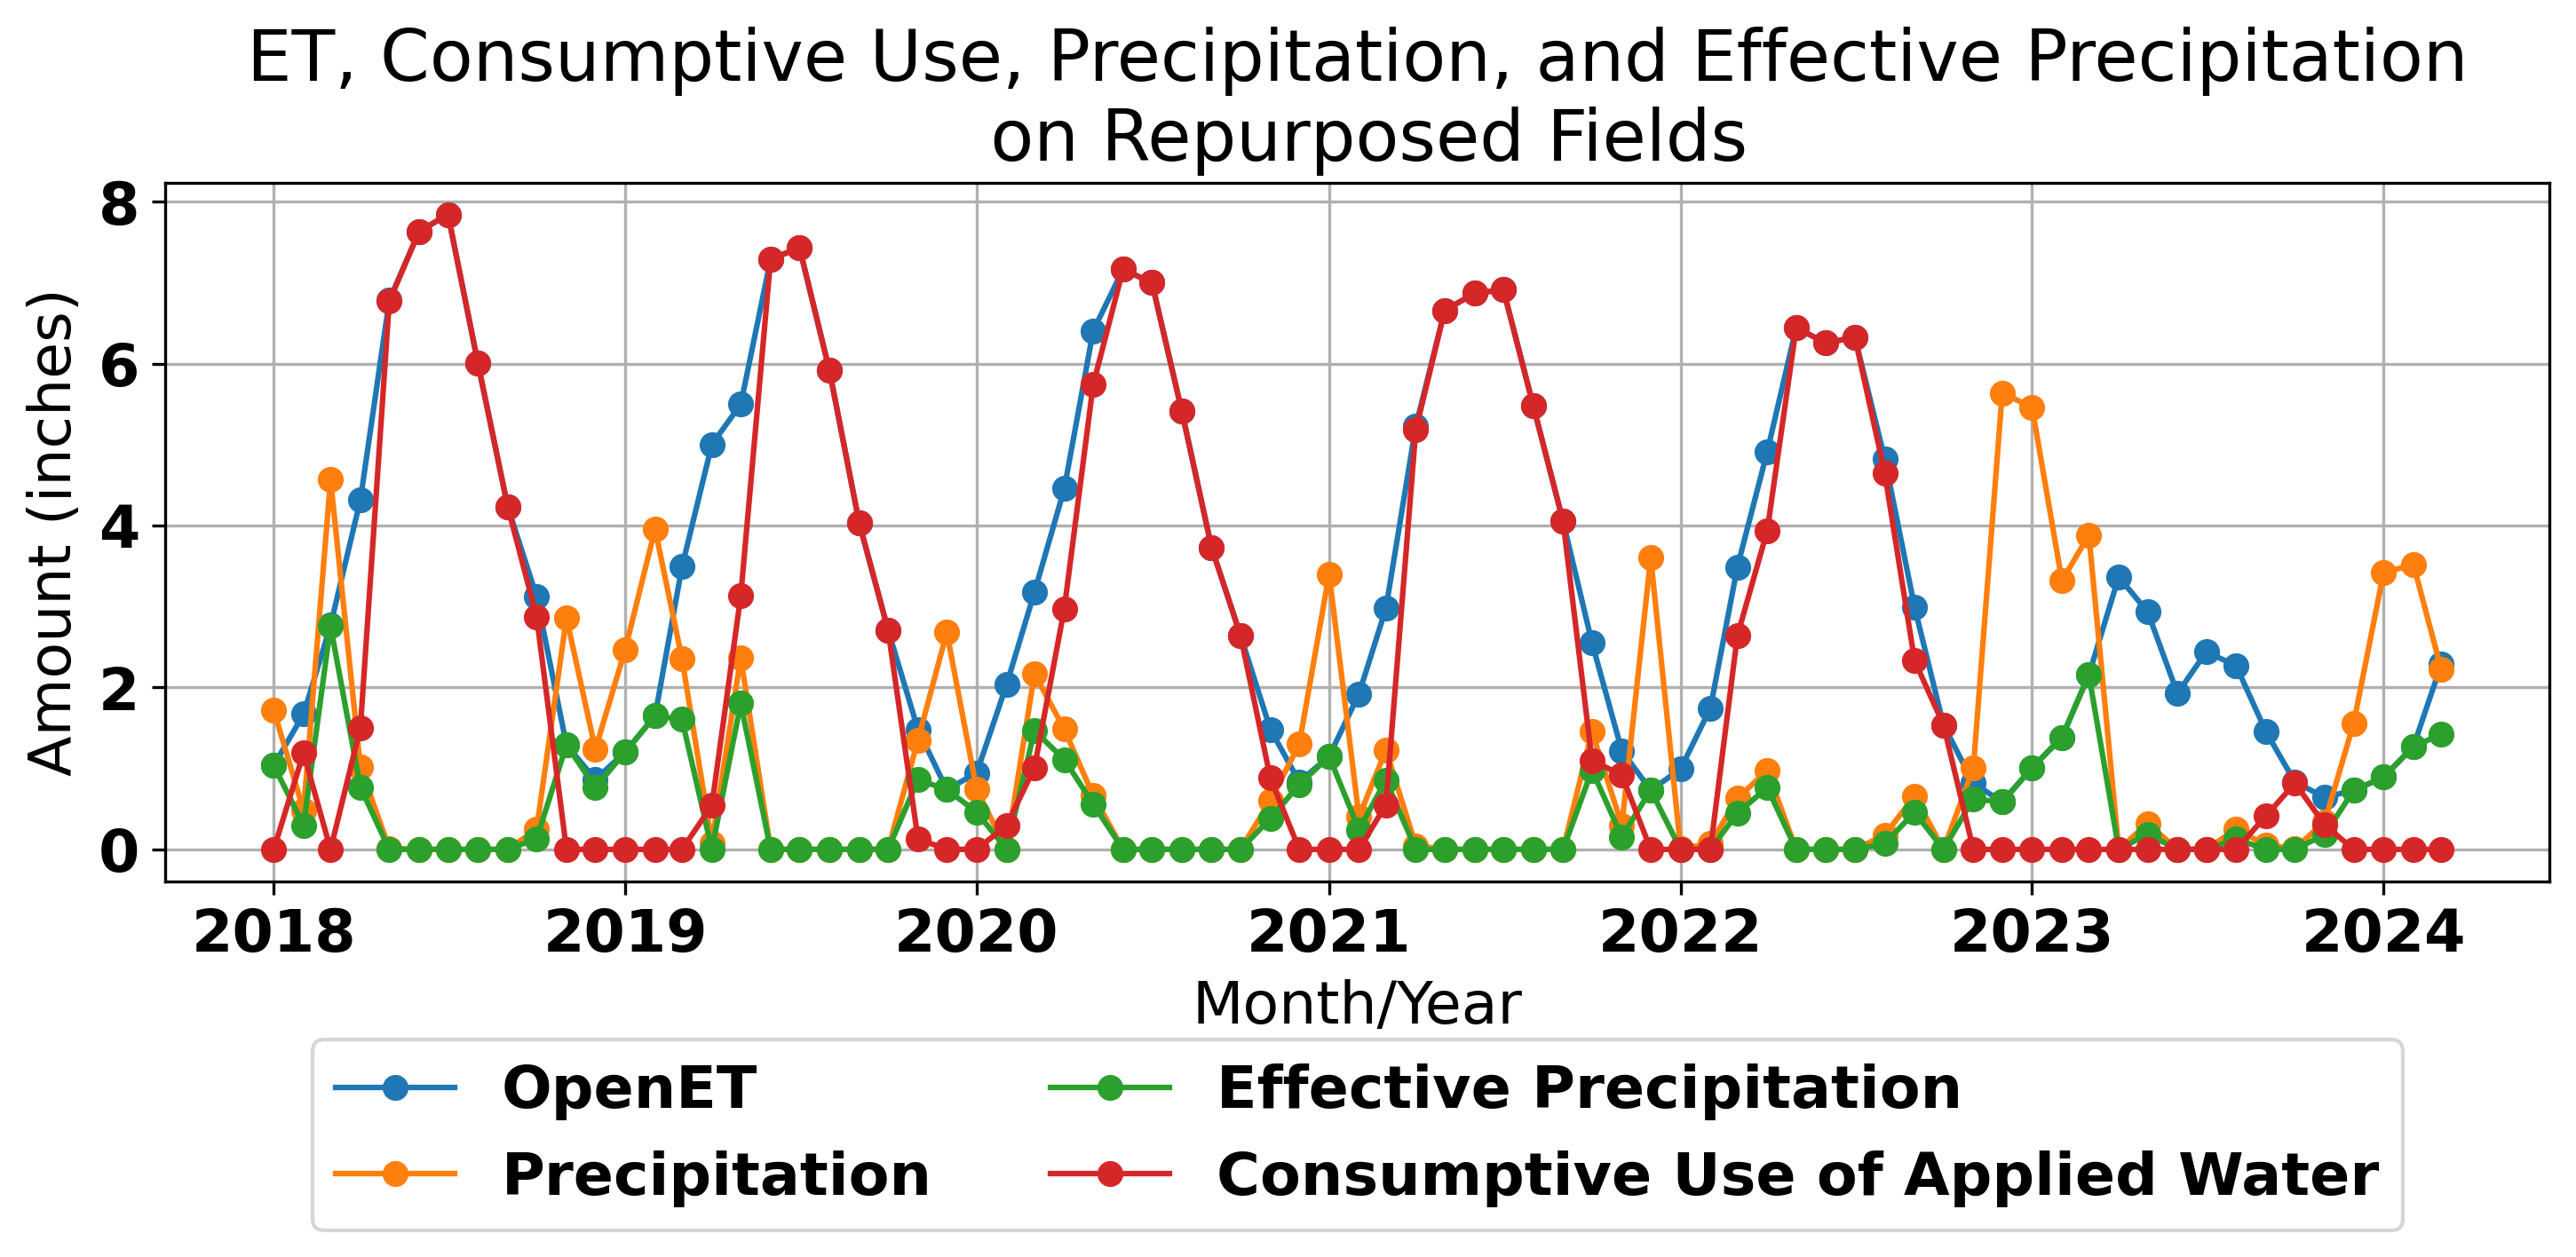

In [8]:
# Conduct data analysis and generate report from pdf 

pdf_report = "Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\Quarterly\WY2024_Q2\Report_PDFs\MSGSA_LRP_quarterly_report_WY2024-Q2_00007_Robson.pdf"

try:
    report = query_openet.GenerateLrpReport.from_pdf_template(pdf_report)
    smb = report.generate_lrp_report(fn_pp='./data/Year1_enrolled_repurposed_pr.csv',
                                 fn_et='./data/Year1_enrolled_repurposed_ET.csv',
                                 fn_fld_key='./data/EKIfld_IDs_key.csv',
                                 water_year=2024,
                                 quarter="Q2",
                                 fn_report_out="./reports/test_report_Robson.pdf"
                                 )
# save the 
    smb.save_consumptive_use_to_csv("reports")

except Exception as e:
    print(e)


Creating report with the following information
LRPAgreementNumber  00010
LRPParticipantName  Fermin Campos
AreaofLandRepurposed  933.62 acres
MinimumWaterUseReduction  1877.58 AFY
BaselineWaterUse  1978.39 AFY
MaximumConsumptiveUse  100.81 AFY
calculating consumptive use for 2     57
3     58
4     59
5     60
6     61
7     62
8     63
9     64
10    65
11    66
12    67
13    68
14    69
15    70
16    71
17    72
Name: EKIfld, dtype: int64
[Errno 13] Permission denied: 'reports\\test_report_Campos.pdf'


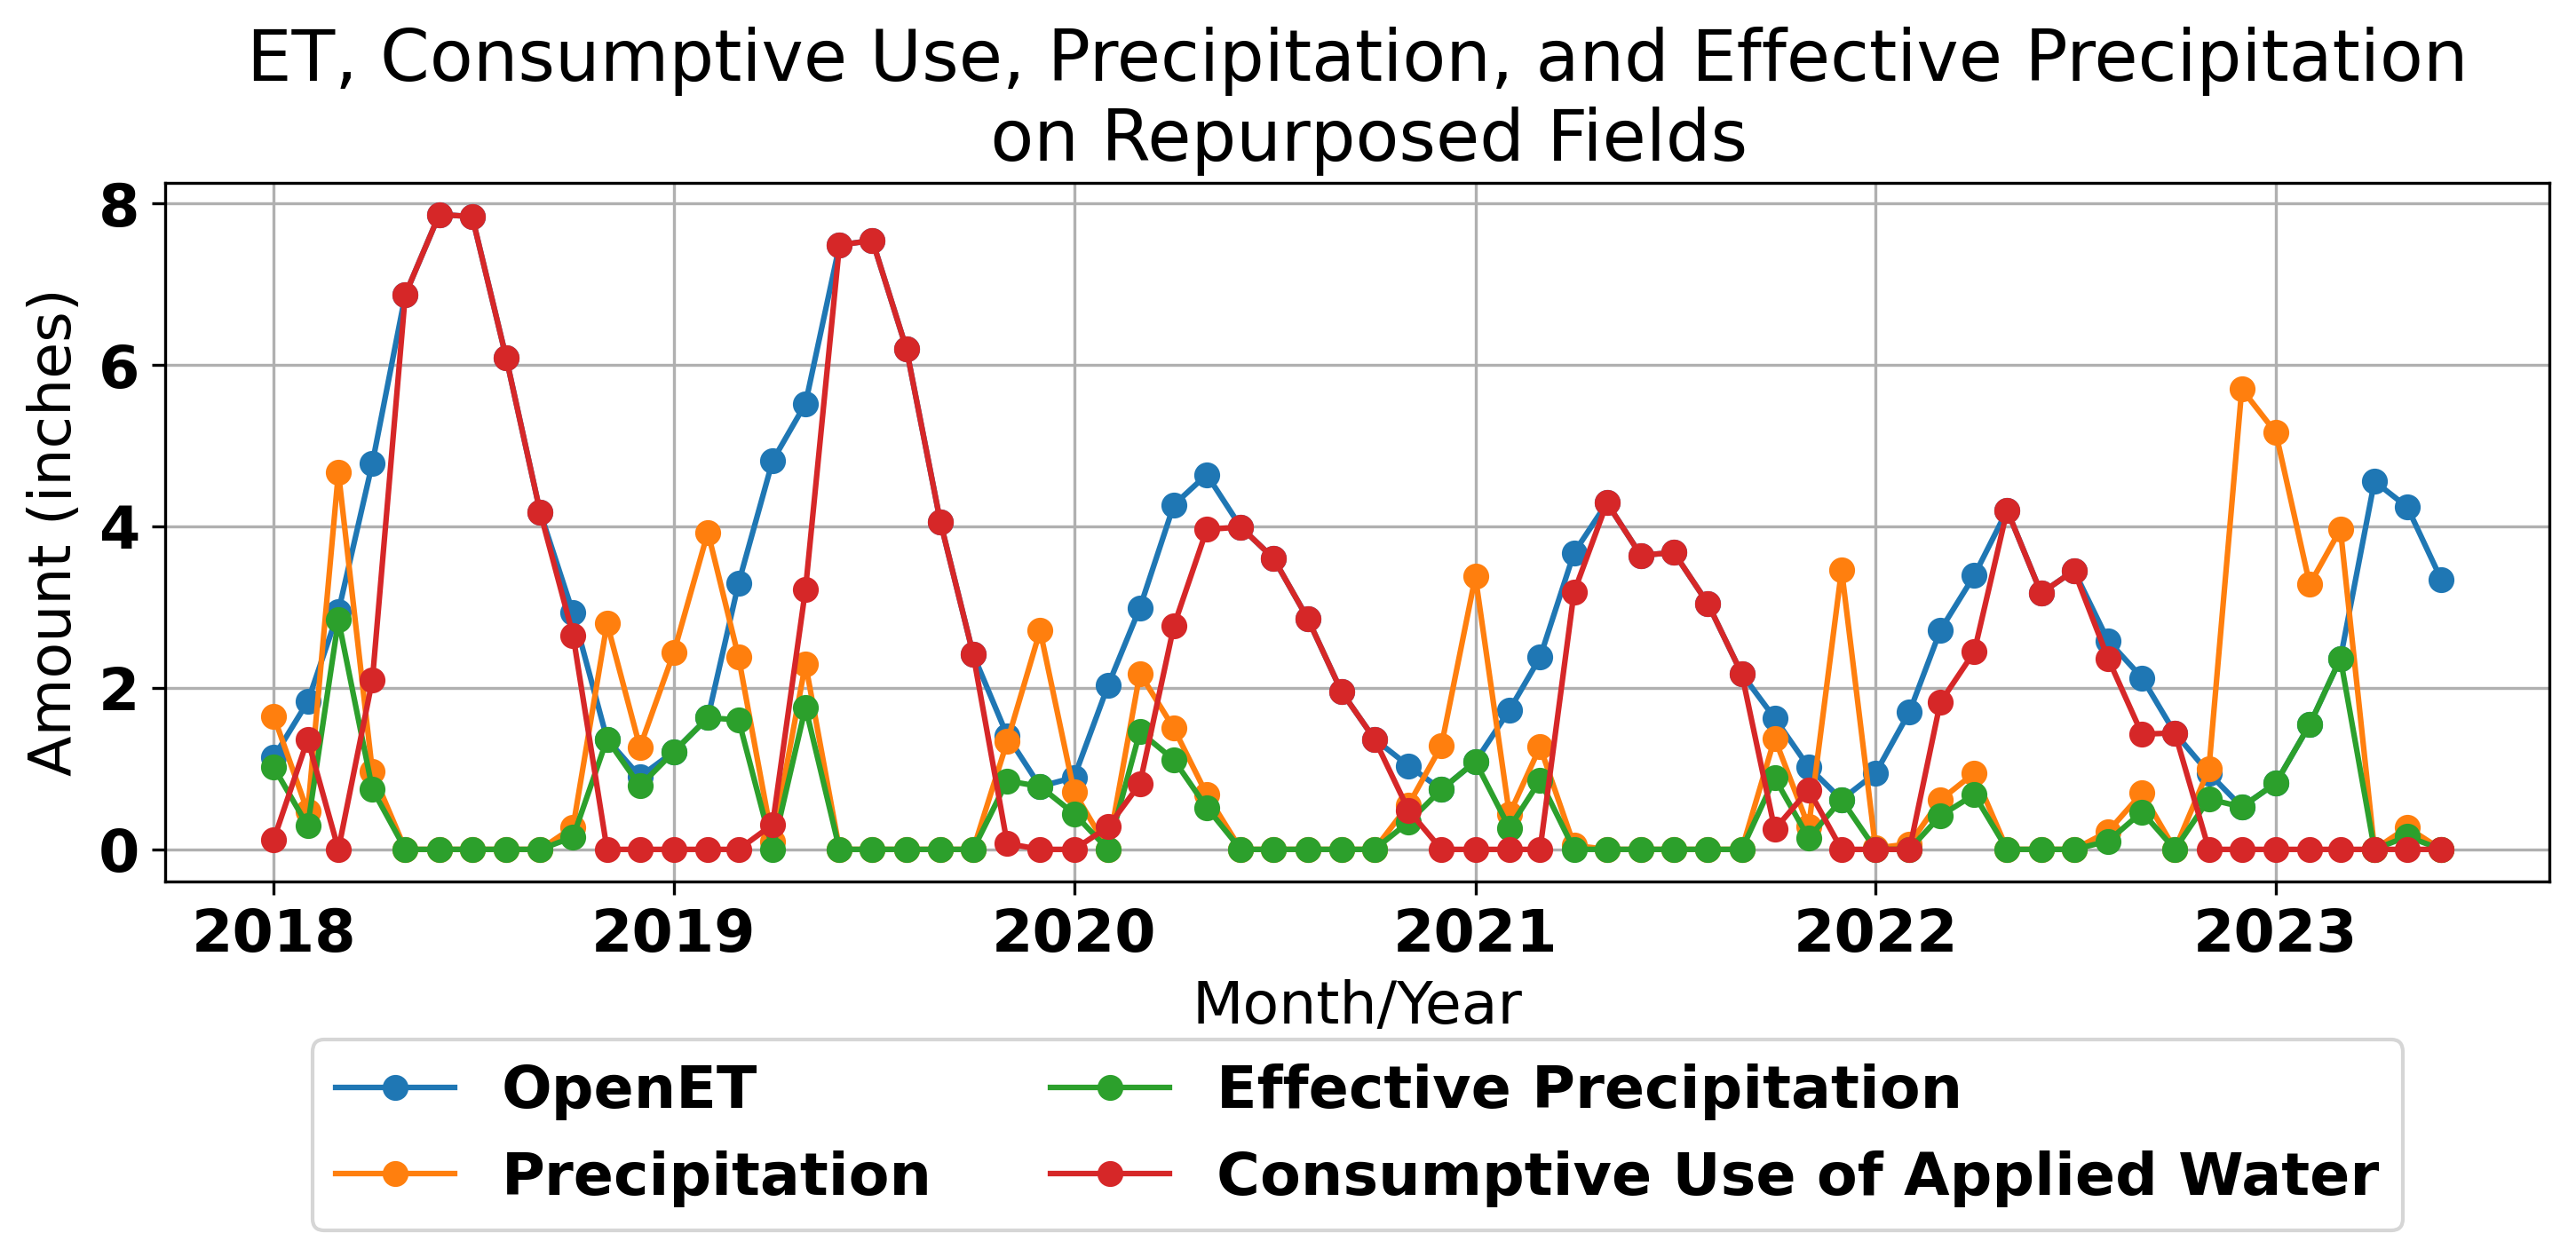

In [6]:
# Conduct data analysis and generate report from pdf 

pdf_report = "Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\Quarterly\WY2023_Q3\WY2023_Q3_qtrly_report_00010_Campos_.pdf"

try:
    report = query_openet.GenerateLrpReport.from_pdf_template(pdf_report)
    smb = report.generate_lrp_report(fn_pp='./data/Year1_enrolled_repurposed_pr.csv',
                                 fn_et='./data/Year1_enrolled_repurposed_ET.csv',
                                 fn_fld_key='./data/EKIfld_IDs_key.csv',
                                 water_year=2023,
                                 quarter="Q3",
                                 fn_report_out="./reports/test_report_Campos.pdf"
                                 )
# save the 
    smb.save_consumptive_use_to_csv("reports")

except Exception as e:
    print(e)
